In [2]:
# magic function para hacer que los graficos de matplotlib se renderizen en el notebook.
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default') # haciendo los graficos un poco mas bonitos xD
plt.rcParams['figure.figsize'] = (15, 5)

In [3]:
sells = pd.read_csv('data/Propiedades-0701.csv')
sells.head()

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,e3cb52c36e2210586ddf90fd0443261ea2e5511f,2017-01-01,sell,house,Quilmes,|Argentina|Bs.As. G.B.A. Zona Sur|Quilmes|Quil...,Argentina,Bs.As. G.B.A. Zona Sur,3429651.0,"-34.744616,-58.277365",...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/14mll_venta_casa_q...,Corredor Responsable: Martin Veltri - C.M.Q 80...,Casa en Venta Quilmes,https://thumbs4.properati.com/7/JUtDrSg4Bi2svp...
1,f1840b53eab0efe00661a89fb38a2c14bb159708,2017-01-01,sell,house,Punilla,|Argentina|Córdoba|Punilla|,Argentina,Córdoba,3839996.0,"-31.447378,-64.518655",...,185.0,NaN,702.702703,NaN,5.0,NaN,http://www.properati.com.ar/14mlv_venta_casa_p...,Corredor Responsable: DANIELA E. CASTRO - CPCP...,Inverti! 2 Casas C/Pileta Carlos Paz,https://thumbs4.properati.com/6/6rEVlpVxiop3Bh...
2,2e61de575b2653733dc55aaed4b08a1e9ae13563,2017-01-01,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.579461,-58.477982",...,43.0,NaN,2534.883721,NaN,1.0,NaN,http://www.properati.com.ar/14mm2_venta_depart...,Corredor Responsable: Juan Carlos Treco - CUCI...,2 AMBIENTES A ESTRENAR C/BALCÓN VILLA URQUIZA,https://thumbs4.properati.com/7/q07Sye4wLYyM3m...
3,5a66865f29a02dbfa89d04ad66e91162c368eb99,2017-01-01,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.579461,-58.477982",...,38.0,NaN,2365.789474,NaN,1.0,NaN,http://www.properati.com.ar/14mm3_venta_depart...,Corredor Responsable: Juan Carlos Treco - CUCI...,2 Ambientes / Monoambiente con balcon a estrenar,https://thumbs4.properati.com/8/HfKdACQrN2vqJi...
4,d8b7669f0f893c317da1ec56b8ccdc9cf3f43913,2017-01-01,sell,house,Córdoba,|Argentina|Córdoba|Córdoba|,Argentina,Córdoba,3860259.0,NaN,...,193.0,NaN,4119.170984,NaN,NaN,NaN,http://www.properati.com.ar/14mn6_venta_casa_c...,Corredor Responsable: Edgardo Tamarit - CPCPI ...,VENDO CASA SAN VICENTE IDEAL PARA INVERSORES,https://thumbs4.properati.com/3/Ba8uKvp4bV5Pon...


In [4]:
# con esto borro una columna del dataframe (id, operation, place_with_parents_name, country_name, geonames_id(ver si sirve)
# lat-lon, price_aprox_local_currency, price_usd_per_m2, price_per_m2, floor, description, title, image_thumbnail)
sells = sells.drop(sells.columns[[0, 2, 5, 6, 8, 9, 14, 18, 19, 20, 24, 25, 26]], axis=1) 

In [5]:
sells.columns.values

array(['created_on', 'property_type', 'place_name', 'state_name', 'lat',
       'lon', 'price', 'currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'rooms', 'expenses',
       'properati_url'], dtype=object)

In [6]:
sells.head(100)

,created_on,property_type,place_name,state_name,lat,lon,price,currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,expenses,properati_url
0,2017-01-01,house,Quilmes,Bs.As. G.B.A. Zona Sur,-34.744616,-58.277365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/14mll_venta_casa_q...
1,2017-01-01,house,Punilla,Córdoba,-31.447378,-64.518655,130000.0,USD,130000.00,NaN,185.0,5.0,NaN,http://www.properati.com.ar/14mlv_venta_casa_p...
2,2017-01-01,apartment,Villa Urquiza,Capital Federal,-34.579461,-58.477982,109000.0,USD,109000.00,NaN,43.0,1.0,NaN,http://www.properati.com.ar/14mm2_venta_depart...
3,2017-01-01,apartment,Villa Urquiza,Capital Federal,-34.579461,-58.477982,89900.0,USD,89900.00,NaN,38.0,1.0,NaN,http://www.properati.com.ar/14mm3_venta_depart...
4,2017-01-01,house,Córdoba,Córdoba,NaN,NaN,795000.0,ARS,48443.11,NaN,193.0,NaN,NaN,http://www.properati.com.ar/14mn6_venta_casa_c...
5,2017-01-01,apartment,San Telmo,Capital Federal,-34.622790,-58.377206,80000.0,USD,80000.00,NaN,47.0,3.0,NaN,http://www.properati.com.ar/14mo0_venta_depart...
6,2017-01-01,house,La Plata,Bs.As. G.B.A. Zona Sur,-34.925402,-57.913334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/14moc_venta_casa_l...
7,2017-01-01,store,Centro / Microcentro,Capital Federal,-34.601819,-58.376713,200000.0,USD,200000.00,NaN,20.0,NaN,NaN,http://www.properati.com.ar/14moh_venta_local_...
8,2017-01-01,house,Río Ceballos,Córdoba,-31.163823,-64.326000,900000.0,ARS,54841.26,NaN,110.0,NaN,NaN,http://www.properati.com.ar/14moi_venta_casa_r...
9,2017-01-01,apartment,Morón,Bs.As. G.B.A. Zona Oeste,-34.644414,-58.622900,76000.0,USD,76000.00,NaN,50.0,2.0,NaN,http://www.properati.com.ar/14mox_venta_depart...


In [7]:
#uso regex para buscar coincidencias por string
sells_caba = sells.loc[sells['state_name'].str.contains(r'(Capital Federal|capital federal)')]
sells_caba.count()

/home/prp-admin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


created_on               21983
property_type            21983
place_name               21983
state_name               21983
lat                      19852
lon                      19852
price                    20159
currency                 20159
price_aprox_usd          20159
surface_total_in_m2      17030
surface_covered_in_m2    21069
rooms                    17772
expenses                  4034
properati_url            21983
dtype: int64

In [8]:
#filtro barrio Capital Federal de caba
sells_caba = sells_caba[sells_caba['place_name']!='Capital Federal']
sells_caba.count()

created_on               21346
property_type            21346
place_name               21346
state_name               21346
lat                      19757
lon                      19757
price                    19565
currency                 19565
price_aprox_usd          19565
surface_total_in_m2      16474
surface_covered_in_m2    20482
rooms                    17718
expenses                  4023
properati_url            21346
dtype: int64

In [9]:
#uso regex para buscar coincidencias por string
sells_gba = sells.loc[sells['state_name'].str.contains(r'(G.B.A|Zona Norte|Zona Sur|Zona Este|Zona Oeste)')]
sells_gba.count()

/home/prp-admin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


created_on               32592
property_type            32592
place_name               32586
state_name               32592
lat                      24121
lon                      24121
price                    27557
currency                 27557
price_aprox_usd          27557
surface_total_in_m2      24409
surface_covered_in_m2    28922
rooms                    17680
expenses                  1935
properati_url            32592
dtype: int64

In [10]:
sells_caba_price = sells_caba.loc[:,['state_name','place_name','price_aprox_usd']]
sells_caba_price.head(10)

,state_name,place_name,price_aprox_usd
2,Capital Federal,Villa Urquiza,109000.0
3,Capital Federal,Villa Urquiza,89900.0
5,Capital Federal,San Telmo,80000.0
7,Capital Federal,Centro / Microcentro,200000.0
16,Capital Federal,Flores,170000.0
17,Capital Federal,Colegiales,320000.0
20,Capital Federal,Colegiales,379000.0
21,Capital Federal,Colegiales,490000.0
22,Capital Federal,Colegiales,187000.0
25,Capital Federal,Recoleta,295000.0


In [11]:
sells_caba_group = sells_caba_price.groupby('place_name')
sells_caba_group.mean()

,price_aprox_usd
place_name,
Abasto,1.466321e+05
Agronomía,1.555554e+05
Almagro,1.711046e+05
Balvanera,1.520413e+05
Barracas,1.894031e+05
Barrio Norte,3.006662e+05
Belgrano,3.353222e+05
Boca,1.435346e+05
Boedo,4.490916e+05


In [12]:
#defino cantidad de ventas por barrio
sells_caba_group_count = sells_caba_group.count()['state_name']
sells_caba_group_count.sort_values(ascending=False)

place_name
Palermo                 1872
Belgrano                1693
Caballito               1487
Recoleta                1054
Barrio Norte            1045
Almagro                  952
Flores                   881
Villa Urquiza            835
Boedo                    825
Villa Crespo             779
San Cristobal            573
Balvanera                548
Nuñez                    517
San Telmo                513
Monserrat                415
Puerto Madero            415
Floresta                 385
Villa Devoto             368
Barracas                 340
Mataderos                315
Saavedra                 292
Congreso                 288
Colegiales               273
Liniers                  269
Centro / Microcentro     248
Palermo Hollywood        247
Villa del Parque         245
San Nicolás              243
Palermo Soho             218
Villa Luro               203
                        ... 
Retiro                   191
Palermo Chico            176
Constitución             175
Onc

In [13]:
#como hay min 2 cantidad de ventas y max 1872, filtro por >= 15
sells_caba_group = sells_caba_price.groupby('place_name').agg([np.mean,np.size])
sells_caba_group = sells_caba_group.loc[sells_caba_group[('price_aprox_usd','size')]>=15,:]   
sells_caba_group.head()


price_aprox_usd       
                      mean   size
place_name                       
Abasto       146632.142857   98.0
Agronomía    155555.428571   38.0
Almagro      171104.619394  952.0
Balvanera    152041.283515  548.0
Barracas     189403.110093  340.0

In [14]:
#top 10 CABA promedio
sells_caba_sort_desc = sells_caba_group.sort_values(('price_aprox_usd','mean'), ascending=False)
sells_caba_sort_desc.head(10)

price_aprox_usd        
                         mean    size
place_name                           
Palermo Chico    1.083807e+06   176.0
Puerto Madero    8.977430e+05   415.0
Boedo            4.490916e+05   825.0
Recoleta         4.268494e+05  1054.0
San Cristobal    3.820352e+05   573.0
Retiro           3.750865e+05   191.0
Palermo Viejo    3.517349e+05    36.0
Belgrano         3.353222e+05  1693.0
Palermo          3.334367e+05  1872.0
Las Cañitas      3.096020e+05   166.0

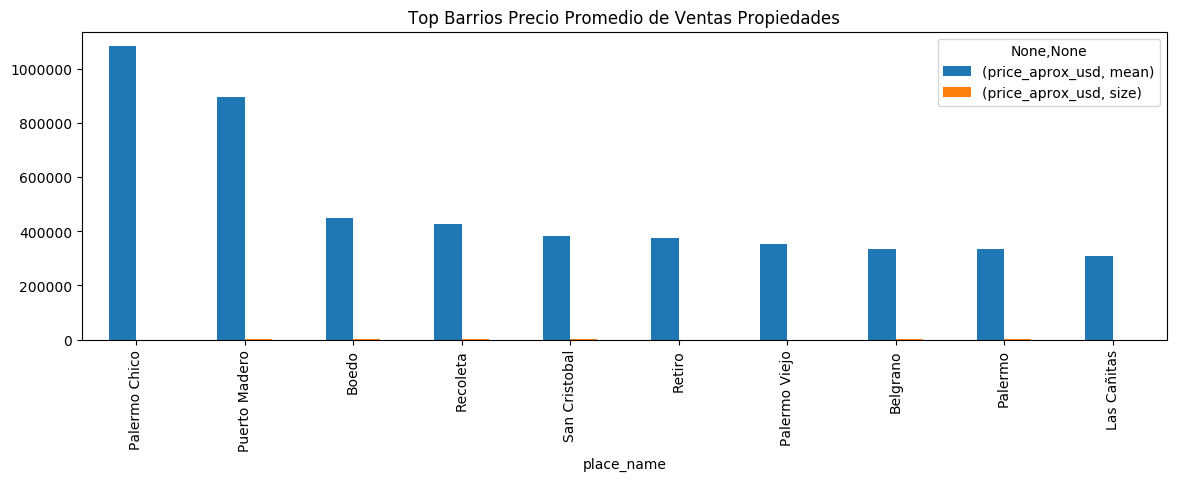

In [15]:
#top 10 CABA promedio
plt.figure()
plt.ylabel = "1"
sells_caba_sort_desc[0:10].plot(title = "Top Barrios Precio Promedio de Ventas Propiedades",kind='bar',figsize=(14,4))


In [16]:
#TOP 10 CABA promedio Ascendente
sells_caba_sort_asc = sells_caba_group.sort_values(('price_aprox_usd','mean'), ascending=True)
sells_caba_sort_asc.head(10)

price_aprox_usd       
                             mean   size
place_name                              
Villa Soldati        83412.872143   15.0
Constitución        114404.819885  175.0
Villa Riachuelo     130384.615385   16.0
Villa Lugano        136120.926640  162.0
Parque Avellaneda   138686.206897   64.0
Paternal            139869.123382  145.0
Boca                143534.597460  140.0
Abasto              146632.142857   98.0
Monserrat           150172.747846  415.0
Liniers             150434.300895  269.0

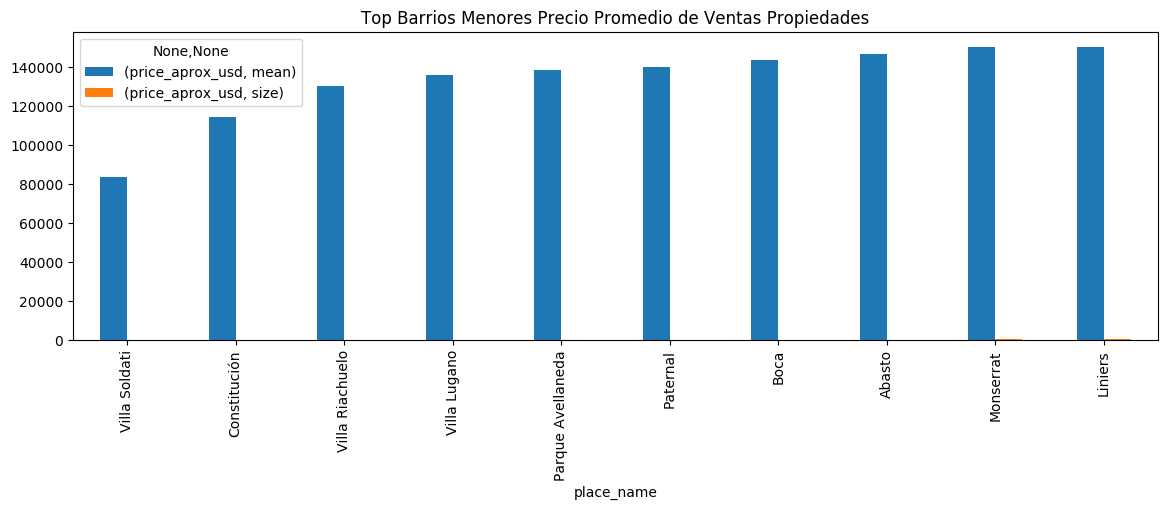

In [17]:
#top 10 CABA promedio Ascendente
plt.figure()
plt.ylabel = "1"
sells_caba_sort_asc[0:10].plot(title = "Top Barrios Menores Precio Promedio de Ventas Propiedades",kind='bar',figsize=(14,4))


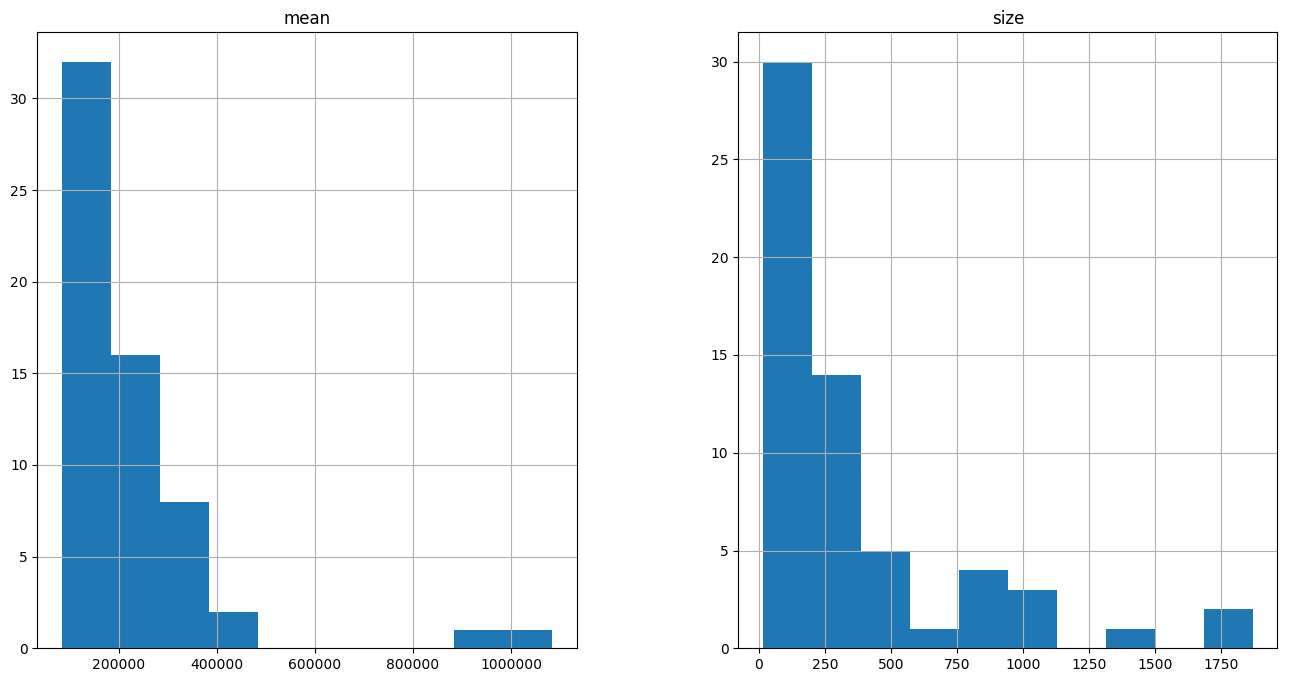

In [18]:
# Histograma de cantidad de promedio de precios y cantidad de ventas
sells_caba_group['price_aprox_usd'].hist(figsize=(16,8));

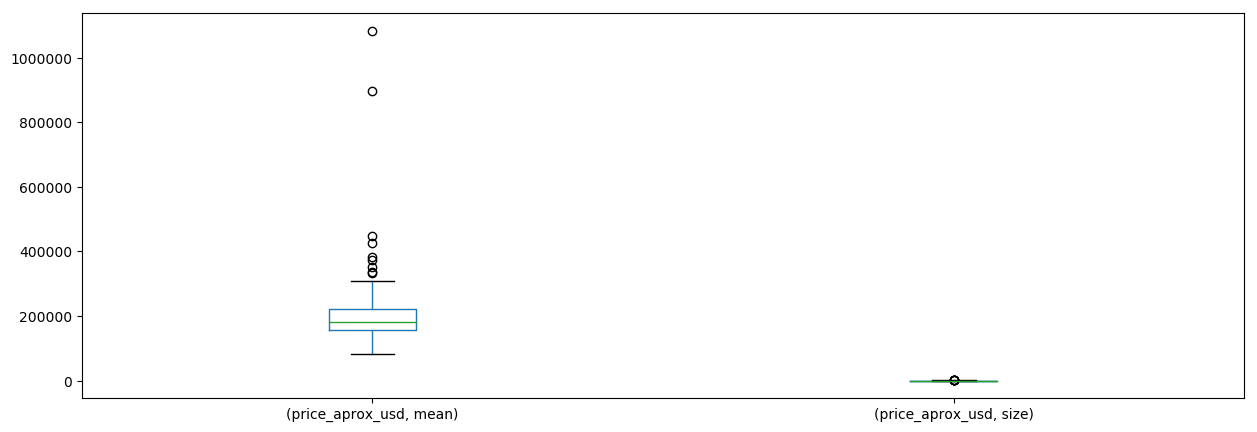

In [40]:
#concentracion de precios y cantidad de ventas
sells_caba_group.plot.box(figsize=(15,5));

In [54]:
sells_gba_price = sells_gba.loc[:,['state_name','place_name','price_aprox_usd']]
sells_gba_price.head(10)

,state_name,place_name,price_aprox_usd
0,Bs.As. G.B.A. Zona Sur,Quilmes,NaN
6,Bs.As. G.B.A. Zona Sur,La Plata,NaN
9,Bs.As. G.B.A. Zona Oeste,Morón,76000.0
10,Bs.As. G.B.A. Zona Norte,San Miguel,300000.0
11,Bs.As. G.B.A. Zona Sur,Lanús,120000.0
12,Bs.As. G.B.A. Zona Norte,Villa Ballester,NaN
13,Bs.As. G.B.A. Zona Norte,Villa Ballester,NaN
14,Bs.As. G.B.A. Zona Norte,Villa Ballester,NaN
26,Bs.As. G.B.A. Zona Norte,Martínez,170000.0
27,Bs.As. G.B.A. Zona Norte,Martínez,170000.0


In [20]:
sells_gba_group = sells_gba_price.groupby("place_name")
sells_gba_group.mean()

,price_aprox_usd
place_name,
Country Maschwitz Club,296666.666667
los alamos,81600.000000
9 de Abril,NaN
Abasto,144000.000000
Abril Club de Campo,627142.857143
Acacias Blancas,256578.947368
Acassuso,622232.718894
Adrogué,282338.224568
Aero Country Club,126500.000000


In [21]:
#defino cantidad de ventas por barrio
sells_gba_group_count = sells_gba_group.count()['state_name']
sells_gba_group_count.sort_values(ascending=False)

place_name
Nordelta                               2238
Tigre                                  1883
La Plata                               1742
Pilar                                  1559
Ramos Mejía                            1011
Olivos                                  974
Ituzaingó                               797
Morón                                   721
San Miguel                              707
Martínez                                693
San Isidro                              658
Benavidez                               649
Quilmes                                 607
San Fernando                            514
Vicente López                           480
Escobar                                 468
Haedo                                   446
Moreno                                  425
Caseros                                 413
Villa Ballester                         392
Florida                                 371
Victoria                                334
Los Pingüinos Country

In [22]:
#como hay min 2 cantidad de ventas y max 2238, filtro por >= 15
sells_gba_group = sells_gba_price.groupby('place_name').agg([np.mean,np.size])
sells_gba_group = sells_gba_group.loc[sells_gba_group[('price_aprox_usd','size')]>=15,:]   
sells_gba_group.head(100)

price_aprox_usd        
                                                mean    size
place_name                                                  
Acacias Blancas                        256578.947368    19.0
Acassuso                               622232.718894   221.0
Adrogué                                282338.224568   163.0
Almirante Brown                        300500.000000    22.0
Avellaneda                             129901.747069   195.0
Banfield                               172112.264706   174.0
Barrio El Golf                         379071.428571    70.0
Barrio El Moro                         204086.956522    29.0
Barrio La Alameda                      411391.304348    47.0
Barrio Las Caletas                     236000.000000    17.0
Barrio Los Alisos                      304896.813892   187.0
Barrio Los Castores                    959062.500000    16.0
Barrio Los Jazmines - Pilar del Este   218221.503784    38.0
Barrio Los Lagos                       628741.935484    31.0
Barrio San Agustin                     370666.666667    18.0
Barrio San Francisco                   374833.333333    24.0
Barrio San Gabriel                     355902.439024    83.0
Barrio San Isidro Labrador             450549.019608    52.0
Barrio Santa Teresa                    375416.666667    48.0
BarrioPortezuelo                       224828.431373    52.0
Beccar                                 420561.841495   306.0
Bella Vista                            225021.669917   262.0
Belén de Escobar                       215009.028862   170.0
Benavidez                              420204.484858   649.0
Berazategui                            234922.898547   157.0
Bernal                                 145256.291170   145.0
Boat Center Barrio Cerrado             455333.333333    15.0
Boca Ratón                             228026.315789    21.0
Boulogne Sur Mer                       241952.678571   114.0
Bs.As. G.B.A. Zona Norte               284368.924000   108.0
...                                              ...     ...
Grand Bourg                            159325.297407    27.0
Guernica                               221687.438611    42.0
Haedo                                  157840.243902   446.0
Haras Santa Maria                      297691.176471    70.0
Hurlingham                             198194.252874   135.0
Ingeniero Pablo Nogués                 257976.955000    30.0
Isidro Casanova                        119842.105263    44.0
Ituzaingó                              171046.973075   797.0
Jose Leon Suarez                       116774.418605    46.0
Jose Marmol                            172272.727273    34.0
José C Paz                             107885.554769   133.0
La Comarca                             389650.000000    20.0
La Lucila                              382809.571429   276.0
La Matanza                             101660.705000   136.0
La Peregrina                           312600.000000    15.0
La Plata                               150193.712294  1742.0
La Reja                                136028.750476    22.0
La Tablada                             174857.142857    30.0
Lanús                                  138665.828636   312.0
Lanús Este                             163247.470417   121.0
Lanús Oeste                            117429.816804   194.0
Llavallol                              159335.537895    19.0
Loma Hermosa                           103687.500000    29.0
Loma Verde                             225161.764706    41.0
Lomas de Zamora                        174865.492520   256.0
Lomas del Mirador                      118199.183206   144.0
Longchamps                             172285.281739    28.0
Los Hornos                             104289.459375    18.0
Los Lagartos Country Club              375277.777778    19.0
Los Pingüinos Country Club             925000.000000   318.0

[100 rows x 2 columns]

In [23]:
#top 10 GBA promedio
sells_gba_sort_desc = sells_gba_group.sort_values(('price_aprox_usd','mean'), ascending=False)
sells_gba_sort_desc.head(10)

price_aprox_usd       
                                        mean   size
place_name                                         
Barrio Los Castores            959062.500000   16.0
Los Pingüinos Country Club     925000.000000  318.0
Santa Barbara Barrio Cerrado   750118.666667   75.0
Barrio Los Lagos               628741.935484   31.0
Acassuso                       622232.718894  221.0
Mayling Club de Campo          579000.000000   28.0
Country San Jorge Village      548800.000000   21.0
El Encuentro                   521500.000000   20.0
Fincas de Iraola               510352.941176   18.0
Carmel Country Club            492000.000000   44.0

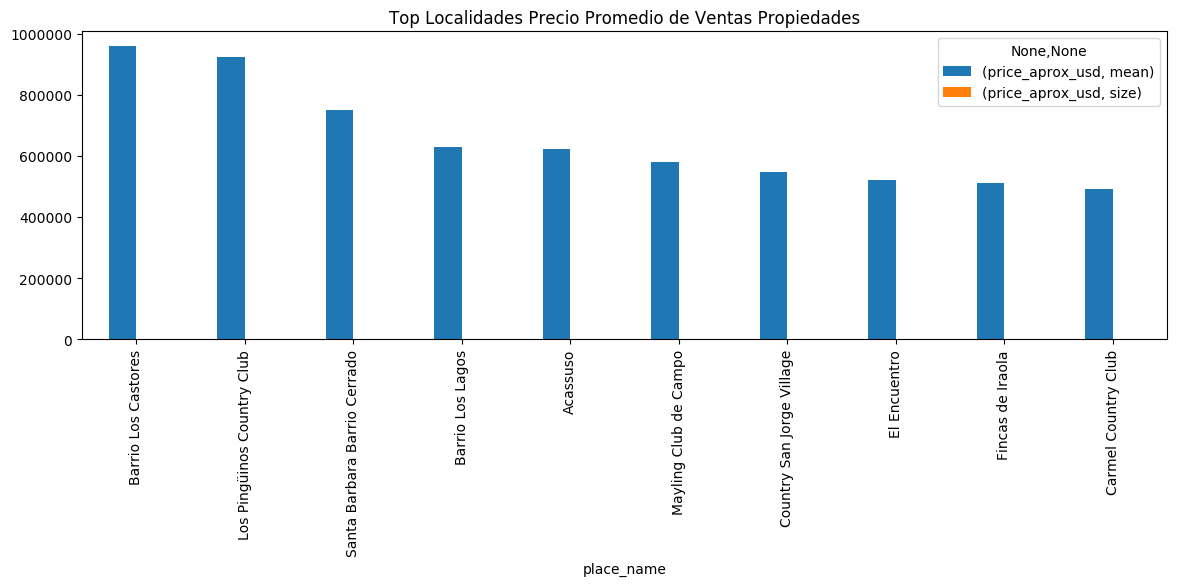

In [24]:
#top 10 GBA promedio
plt.figure()
plt.ylabel = "1"
sells_gba_sort_desc[0:10].plot(title = "Top Localidades Precio Promedio de Ventas Propiedades",kind='bar',figsize=(14,4))


In [25]:
#top 10 GBA promedio Ascendente
sells_gba_sort_asc = sells_gba_group.sort_values(('price_aprox_usd','mean'), ascending=True)
sells_gba_sort_asc.head(10)

price_aprox_usd       
                                mean   size
place_name                                 
San Carlos              60309.590000   15.0
Villa Tesei             82200.000000   17.0
Ciudadela               90492.727273  175.0
Ezpeleta                90673.258571   17.0
Remedios de Escalada    96820.886016  123.0
La Matanza             101660.705000  136.0
Loma Hermosa           103687.500000   29.0
Los Hornos             104289.459375   18.0
Sáenz Peña             107148.065904   85.0
José C Paz             107885.554769  133.0

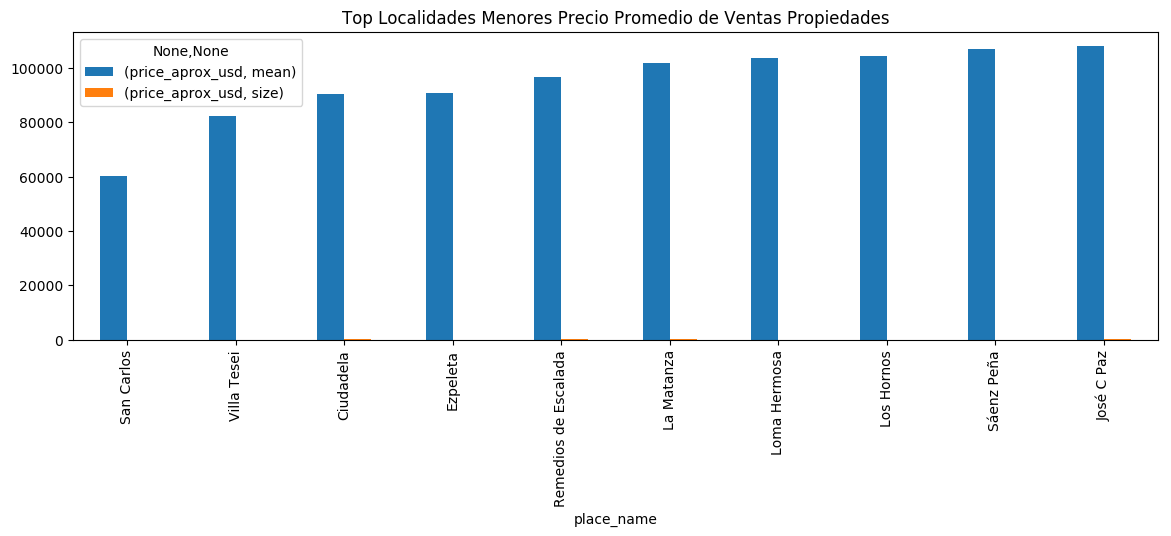

In [26]:
#top 10 GBA promedio Ascendente
plt.figure()
plt.ylabel = "1"
sells_gba_sort_asc[0:10].plot(title = "Top Localidades Menores Precio Promedio de Ventas Propiedades",kind='bar',figsize=(14,4))


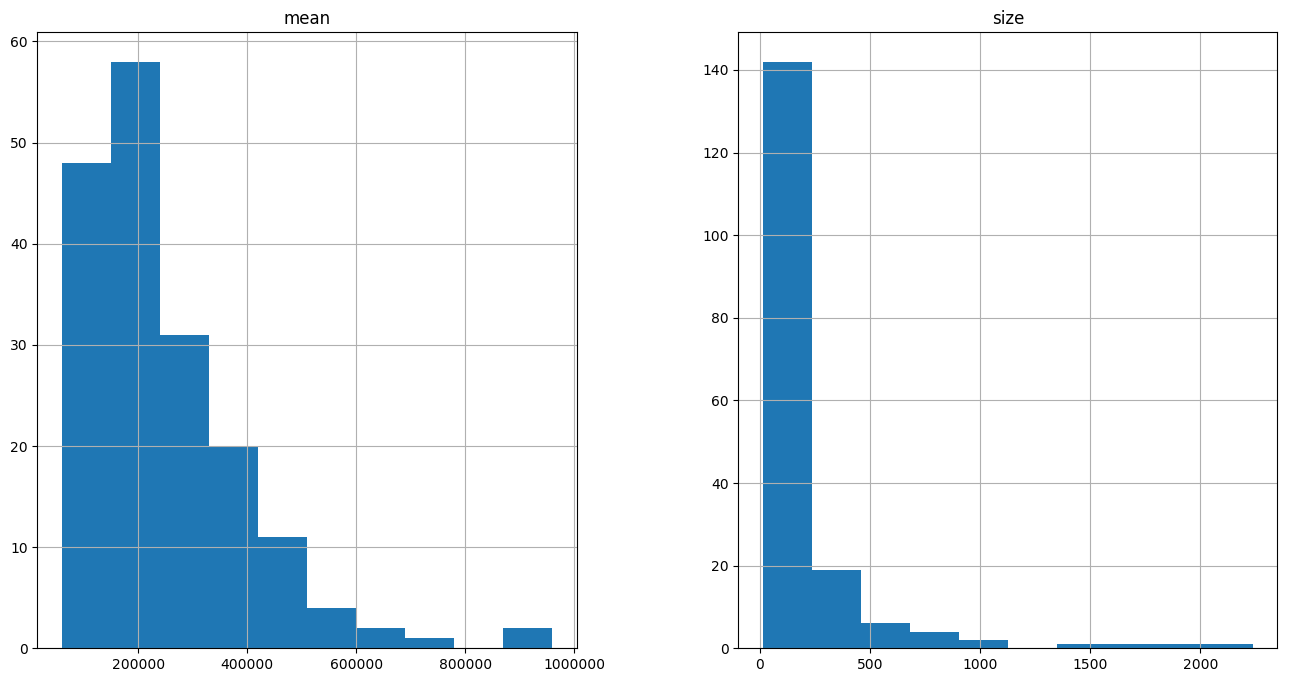

In [27]:
# Histograma de cantidad de promedio de precios y cantidad de ventas
sells_gba_group['price_aprox_usd'].hist(figsize=(16,8));

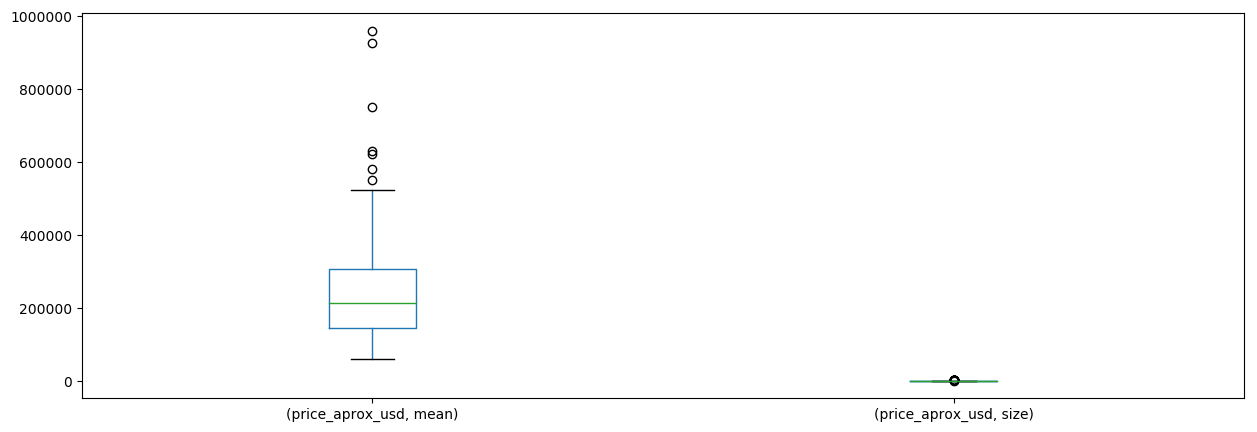

In [39]:
#concentracion de promedio precios y cantidad de ventas
sells_gba_group.plot.box(figsize=(15,5));